In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1**

Logistic Regression Accuracy: 0.89
Naive Bayes Accuracy: 0.85

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4961
           1       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



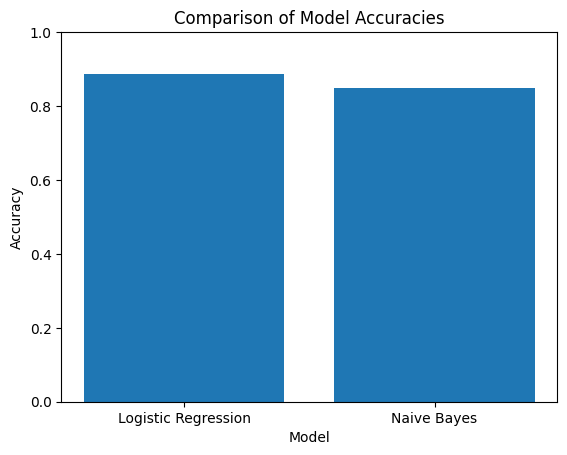

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt



# a
data = pd.read_csv('/content/drive/MyDrive/440/Assignment 1/IMDB Dataset.csv')

data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

reviews = data['review']
sentiments = data['sentiment']



# b
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)



# c
X_train, X_test, y_train, y_test = train_test_split(X, sentiments, test_size=0.2, random_state=42)



# d
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)



# e
logistic_accuracy = accuracy_score(y_test, y_pred_logistic)
naive_bayes_accuracy = accuracy_score(y_test, y_pred_naive_bayes)

print(f"Logistic Regression Accuracy: {logistic_accuracy:.2f}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.2f}")

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

print("\nClassification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_naive_bayes))

models = ['Logistic Regression', 'Naive Bayes']
accuracies = [logistic_accuracy, naive_bayes_accuracy]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()


**Logistic Regression** is better than Naive Bayes.

Higher accuracy (**0.89 vs. 0.85**).
Better precision, recall, and F1-scores for both classes.
Superior macro and weighted averages across all metrics.

# **2**

Logistic Regression (TF-IDF) Accuracy: 0.90
Naive Bayes (TF-IDF) Accuracy: 0.86

Classification Report for Logistic Regression (TF-IDF):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


Classification Report for Naive Bayes (TF-IDF):
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      4961
           1       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



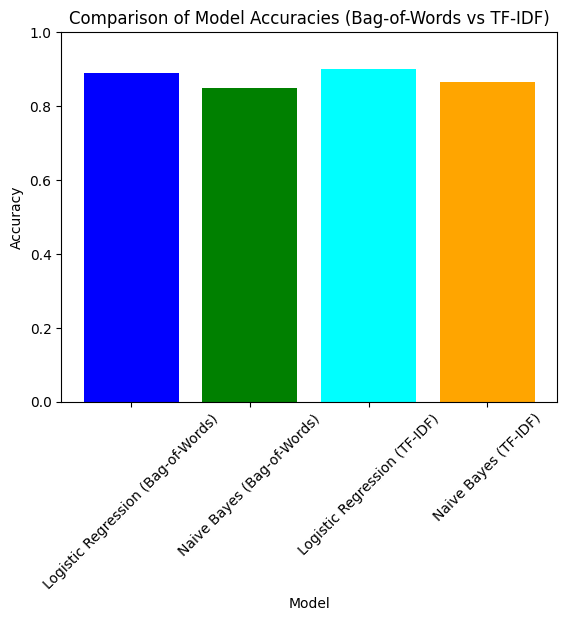

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(reviews)

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, sentiments, test_size=0.2, random_state=42)

logistic_model_tfidf = LogisticRegression(max_iter=1000, solver='liblinear')
logistic_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_logistic_tfidf = logistic_model_tfidf.predict(X_test_tfidf)

naive_bayes_model_tfidf = MultinomialNB()
naive_bayes_model_tfidf.fit(X_train_tfidf, y_train)
y_pred_naive_bayes_tfidf = naive_bayes_model_tfidf.predict(X_test_tfidf)

logistic_accuracy_tfidf = accuracy_score(y_test, y_pred_logistic_tfidf)
naive_bayes_accuracy_tfidf = accuracy_score(y_test, y_pred_naive_bayes_tfidf)

print(f"Logistic Regression (TF-IDF) Accuracy: {logistic_accuracy_tfidf:.2f}")
print(f"Naive Bayes (TF-IDF) Accuracy: {naive_bayes_accuracy_tfidf:.2f}")

print("\nClassification Report for Logistic Regression (TF-IDF):")
print(classification_report(y_test, y_pred_logistic_tfidf))

print("\nClassification Report for Naive Bayes (TF-IDF):")
print(classification_report(y_test, y_pred_naive_bayes_tfidf))

models = ['Logistic Regression (Bag-of-Words)', 'Naive Bayes (Bag-of-Words)',
          'Logistic Regression (TF-IDF)', 'Naive Bayes (TF-IDF)']
accuracies = [logistic_accuracy, naive_bayes_accuracy, logistic_accuracy_tfidf, naive_bayes_accuracy_tfidf]

plt.bar(models, accuracies, color=['blue', 'green', 'cyan', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies (Bag-of-Words vs TF-IDF)')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


Logistic Regression with TF-IDF achieves an accuracy of **0.90**, compared to **0.89** for Bag-of-Words.
Naive Bayes with TF-IDF achieves an accuracy of **0.86**, compared to **0.85** for Bag-of-Words.
TF-IDF consistently improves precision, recall, and F1-scores for both models. The **TF-IDF model** is better than the Bag-of-Words model for both Logistic Regression and Naive Bayes.

# **3**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/440/Assignment 1/IMDB Dataset.csv')
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

reviews = data['review'].values
labels = data['sentiment'].values


max_vocab_size = 10000
max_sequence_length = 200

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(reviews)
word_index = tokenizer.word_index


sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)


embedding_dim = 100
embedding_index = {}

with open('/content/drive/MyDrive/440/Assignment 1/glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector


embedding_matrix = np.zeros((max_vocab_size, embedding_dim))
for word, i in word_index.items():
    if i < max_vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector


model = Sequential([
    Embedding(input_dim=max_vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_sequence_length,
              trainable=False),
    Dense(10, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5418 - accuracy: 0.7160 - val_loss: 0.4577 - val_accuracy: 0.7915
Epoch 2/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4140 - accuracy: 0.8142 - val_loss: 0.4014 - val_accuracy: 0.8226
Epoch 3/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3786 - accuracy: 0.8341 - val_loss: 0.3831 - val_accuracy: 0.8285
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3597 - accuracy: 0.8457 - val_loss: 0.3772 - val_accuracy: 0.8332
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3486 - accuracy: 0.8508 - val_loss: 0.3684 - val_accuracy: 0.8385
Epoch 6/50
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3405 - accuracy: 0.8543 - val_loss: 0.3670 - val_accuracy: 0.8388
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3327 - accuracy: 0.8576 - val_loss: 0.3651 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.3672 - accuracy: 0.8493
Test Loss: 0.3672
Test Accuracy: 0.8493


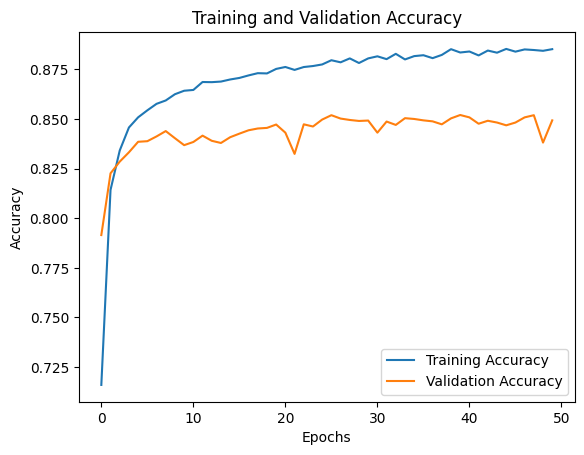

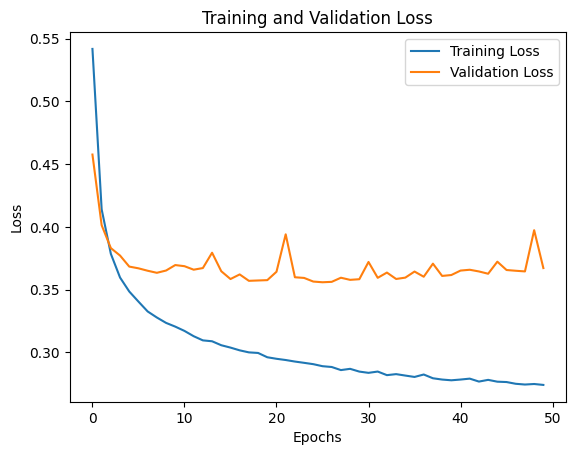

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

This model performs well (0.8493 accuracy) but does not surpass Logistic Regression. *Logistic Regression with TF-IDF* is the best-performing model based on test accuracy (0.90). Adding dropout layers to reduce overfitting, allowing the embedding layer to be trainable for task-specific optimization, stopping training earlier (e.g., around 20 epochs) based on validation performance to avoid overfitting, trying other optimizers like RMSprop or SGD etc and **many other modifications may or may not** improve performance. But **we can definitely play with these later on** and see if these improve performance or not.